In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/pneumonia-ViT2/dataset/dataset-brute

chest_xray


In [ ]:
!pip install --upgrade datasets transformers evaluate torchvision torch matplotlib scikit-learn tqdm imblearn

In [ ]:
!ls /content/drive/MyDrive/chest-xray-pneumonia.zip

ls: cannot access '/content/drive/MyDrive/chest-xray-pneumonia.zip': No such file or directory


In [ ]:
import datasets
print(datasets.__version__)

3.6.0


In [ ]:
!nvidia-smi

Mon May 12 16:13:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
from pathlib import Path
import zipfile
import shutil

# Créer les dossiers
base_dir = Path("/content/drive/MyDrive/pneumonia-ViT3")
dataset_dir = base_dir / "dataset"
raw_dataset_dir = dataset_dir / "dataset-brute"
processed_dataset_dir = dataset_dir / "processed_dataset_v7"
models_dir = base_dir / "models"

os.makedirs(base_dir, exist_ok=True)
os.makedirs(dataset_dir, exist_ok=True)
os.makedirs(raw_dataset_dir, exist_ok=True)
os.makedirs(processed_dataset_dir, exist_ok=True)
os.makedirs(models_dir, exist_ok=True)

# Décompresser le fichier ZIP
zip_path = "/content/drive/MyDrive/chest-xray-pneumonia.zip"
extract_dir = "/content/chest_xray_temp"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Copier les données décompressées dans raw_dataset_dir
source_dir = Path(extract_dir) / "chest_xray"
shutil.copytree(source_dir / "train", raw_dataset_dir / "train", dirs_exist_ok=True)
shutil.copytree(source_dir / "val", raw_dataset_dir / "val", dirs_exist_ok=True)
shutil.copytree(source_dir / "test", raw_dataset_dir / "test", dirs_exist_ok=True)

# Supprimer le dossier temporaire
shutil.rmtree(extract_dir)

print("Dataset brut décompressé et copié :")
!ls -R /content/drive/MyDrive/pneumonia-ViT3/dataset/dataset-brute

Dataset brut décompressé et copié :
/content/drive/MyDrive/pneumonia-ViT3/dataset/dataset-brute:
test  train  val

/content/drive/MyDrive/pneumonia-ViT3/dataset/dataset-brute/test:
NORMAL	PNEUMONIA

/content/drive/MyDrive/pneumonia-ViT3/dataset/dataset-brute/test/NORMAL:
IM-0001-0001.jpeg	   NORMAL2-IM-0173-0001-0001.jpeg
IM-0003-0001.jpeg	   NORMAL2-IM-0173-0001-0002.jpeg
IM-0005-0001.jpeg	   NORMAL2-IM-0195-0001.jpeg
IM-0006-0001.jpeg	   NORMAL2-IM-0196-0001.jpeg
IM-0007-0001.jpeg	   NORMAL2-IM-0198-0001.jpeg
IM-0009-0001.jpeg	   NORMAL2-IM-0199-0001.jpeg
IM-0010-0001.jpeg	   NORMAL2-IM-0201-0001.jpeg
IM-0011-0001-0001.jpeg	   NORMAL2-IM-0206-0001.jpeg
IM-0011-0001-0002.jpeg	   NORMAL2-IM-0207-0001.jpeg
IM-0011-0001.jpeg	   NORMAL2-IM-0210-0001.jpeg
IM-0013-0001.jpeg	   NORMAL2-IM-0213-0001.jpeg
IM-0015-0001.jpeg	   NORMAL2-IM-0217-0001.jpeg
IM-0016-0001.jpeg	   NORMAL2-IM-0219-0001.jpeg
IM-0017-0001.jpeg	   NORMAL2-IM-0221-0001.jpeg
IM-0019-0001.jpeg	   NORMAL2-IM-0222-0001.jpeg
IM-

In [ ]:
import os
from pathlib import Path
import zipfile
import shutil

# Créer les dossiers
base_dir = Path("/content/drive/MyDrive/pneumonia-ViT3")
dataset_dir = base_dir / "dataset"
raw_dataset_dir = dataset_dir / "dataset-brute"
processed_dataset_dir = dataset_dir / "processed_dataset_v7"
models_dir = base_dir / "models"

os.makedirs(base_dir, exist_ok=True)
os.makedirs(dataset_dir, exist_ok=True)
os.makedirs(raw_dataset_dir, exist_ok=True)
os.makedirs(processed_dataset_dir, exist_ok=True)
os.makedirs(models_dir, exist_ok=True)

# Décompresser le fichier ZIP
zip_path = "/content/drive/MyDrive/pneumonia-ViT/kaggle/chest-xray-pneumonia.zip"
extract_dir = "/content/chest_xray_temp"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Copier depuis le dossier imbriqué chest_xray/chest_xray
source_dir = Path("/content/chest_xray_temp/chest_xray/chest_xray")
for split in ['train', 'val', 'test']:
    for condition in ['NORMAL', 'PNEUMONIA']:
        src_path = source_dir / split / condition
        dst_path = raw_dataset_dir / split / condition
        if src_path.exists():
            shutil.copytree(src_path, dst_path, dirs_exist_ok=True)
        else:
            print(f"Dossier non trouvé : {src_path}")

# Supprimer le dossier temporaire
shutil.rmtree(extract_dir)

# Vérifier la structure et compter les images
print("Structure des dossiers dans /content/drive/MyDrive/pneumonia-ViT3/dataset/dataset-brute :")
!find {raw_dataset_dir} -type d

print("\nNombre d'images dans /content/drive/MyDrive/pneumonia-ViT3/dataset/dataset-brute :")
for split in ['train', 'val', 'test']:
    for condition in ['NORMAL', 'PNEUMONIA']:
        img_count = len(glob.glob(str(raw_dataset_dir / split / condition / "*.jpeg")))
        print(f"{split}/{condition}: {img_count} images")

Structure des dossiers dans /content/drive/MyDrive/pneumonia-ViT3/dataset/dataset-brute :
/content/drive/MyDrive/pneumonia-ViT3/dataset/dataset-brute
/content/drive/MyDrive/pneumonia-ViT3/dataset/dataset-brute/train
/content/drive/MyDrive/pneumonia-ViT3/dataset/dataset-brute/train/NORMAL
/content/drive/MyDrive/pneumonia-ViT3/dataset/dataset-brute/train/PNEUMONIA
/content/drive/MyDrive/pneumonia-ViT3/dataset/dataset-brute/val
/content/drive/MyDrive/pneumonia-ViT3/dataset/dataset-brute/val/NORMAL
/content/drive/MyDrive/pneumonia-ViT3/dataset/dataset-brute/val/PNEUMONIA
/content/drive/MyDrive/pneumonia-ViT3/dataset/dataset-brute/test
/content/drive/MyDrive/pneumonia-ViT3/dataset/dataset-brute/test/NORMAL
/content/drive/MyDrive/pneumonia-ViT3/dataset/dataset-brute/test/PNEUMONIA

Nombre d'images dans /content/drive/MyDrive/pneumonia-ViT3/dataset/dataset-brute :
train/NORMAL: 1341 images
train/PNEUMONIA: 3875 images
val/NORMAL: 8 images
val/PNEUMONIA: 8 images
test/NORMAL: 234 images
test/P

In [ ]:
from PIL import Image as PILImage
import glob
from pathlib import Path
from tqdm import tqdm

raw_dataset_dir = Path("/content/drive/MyDrive/pneumonia-ViT3/dataset/dataset-brute")
splits = ['train', 'val']
conditions = ['NORMAL', 'PNEUMONIA']

print("Dimensions des images (100 premières par dossier) :")
for split in splits:
    for condition in conditions:
        img_paths = glob.glob(str(raw_dataset_dir / split / condition / "*.jpeg"))
        if not img_paths:
            print(f"Aucune image dans {raw_dataset_dir / split / condition}")
            continue
        shapes = []
        for img_path in tqdm(img_paths[:100], desc=f"Checking {split}/{condition}"):
            try:
                img = PILImage.open(img_path).convert('RGB')
                img_array = np.array(img)
                shapes.append(img_array.shape)
            except Exception as e:
                print(f"Erreur sur {img_path}: {e}")
        unique_shapes = set(shapes)
        print(f"{split}/{condition}: {len(shapes)} images, formes uniques : {unique_shapes}")

Dimensions des images (100 premières par dossier) :


Checking train/NORMAL: 100%|██████████| 100/100 [00:31<00:00,  3.13it/s]


train/NORMAL: 100 images, formes uniques : {(1399, 1546, 3), (1310, 1542, 3), (1121, 1534, 3), (2540, 2428, 3), (1560, 1568, 3), (1171, 1472, 3), (1329, 1882, 3), (1909, 2566, 3), (1897, 2538, 3), (959, 1298, 3), (1040, 1380, 3), (1438, 1620, 3), (1167, 1644, 3), (1086, 1164, 3), (1480, 1762, 3), (1418, 1808, 3), (850, 1114, 3), (1036, 1296, 3), (1399, 1762, 3), (1553, 1704, 3), (1670, 1874, 3), (1160, 1450, 3), (1634, 1956, 3), (1148, 1364, 3), (960, 1168, 3), (1453, 1588, 3), (1337, 1744, 3), (1527, 1906, 3), (1893, 2292, 3), (1236, 1546, 3), (1542, 1778, 3), (1446, 1812, 3), (862, 1192, 3), (1569, 1860, 3), (1959, 2358, 3), (1074, 1372, 3), (1245, 1462, 3), (1719, 1972, 3), (974, 1442, 3), (1133, 1330, 3), (1653, 1882, 3), (1124, 1646, 3), (1445, 2022, 3), (1576, 1948, 3), (1750, 2064, 3), (1279, 1460, 3), (1407, 1522, 3), (1411, 1592, 3), (1764, 1873, 3), (1924, 2480, 3), (1514, 2302, 3), (1017, 1488, 3), (1391, 1762, 3), (1106, 1450, 3), (1195, 1608, 3), (1283, 1628, 3), (1202, 17

Checking train/PNEUMONIA: 100%|██████████| 100/100 [00:59<00:00,  1.67it/s]


train/PNEUMONIA: 100 images, formes uniques : {(704, 928, 3), (936, 1216, 3), (712, 1312, 3), (512, 896, 3), (640, 944, 3), (866, 1186, 3), (507, 723, 3), (768, 1072, 3), (880, 1336, 3), (784, 1360, 3), (696, 984, 3), (608, 984, 3), (600, 1064, 3), (664, 1072, 3), (334, 649, 3), (604, 1048, 3), (904, 1136, 3), (1044, 1412, 3), (437, 736, 3), (552, 1240, 3), (568, 904, 3), (604, 995, 3), (913, 1450, 3), (932, 1240, 3), (792, 1192, 3), (560, 984, 3), (635, 925, 3), (736, 1128, 3), (776, 1120, 3), (616, 944, 3), (864, 1232, 3), (992, 1504, 3), (704, 888, 3), (1152, 1424, 3), (760, 1296, 3), (1208, 1624, 3), (1164, 1574, 3), (896, 1144, 3), (947, 1276, 3), (537, 942, 3), (816, 1200, 3), (1224, 1424, 3), (648, 1024, 3), (736, 1056, 3), (1040, 1824, 3), (936, 1640, 3), (840, 1336, 3), (656, 928, 3), (1048, 1360, 3), (1136, 1688, 3), (839, 1408, 3), (1144, 1312, 3), (767, 1256, 3), (824, 1248, 3), (1024, 1584, 3), (768, 1160, 3), (632, 1064, 3), (792, 1376, 3), (963, 1280, 3), (544, 992, 3), 

Checking val/NORMAL: 100%|██████████| 8/8 [00:00<00:00, 60.71it/s]


val/NORMAL: 8 images, formes uniques : {(1104, 1240, 3), (1416, 1776, 3), (1416, 1736, 3), (1302, 1564, 3), (928, 1288, 3), (1104, 1328, 3), (1040, 1272, 3), (1225, 1632, 3)}


Checking val/PNEUMONIA: 100%|██████████| 8/8 [00:00<00:00, 120.01it/s]

val/PNEUMONIA: 8 images, formes uniques : {(656, 1016, 3), (712, 1072, 3), (664, 1152, 3), (864, 1256, 3), (592, 968, 3), (952, 1192, 3), (1128, 1664, 3), (944, 1416, 3)}


In [ ]:
import pandas as pd
import glob
from pathlib import Path
from tqdm import tqdm
from PIL import Image as PILImage
import numpy as np
import torch
from torchvision import transforms
from imblearn.over_sampling import RandomOverSampler

# Chemins
raw_dataset_dir = Path("/content/drive/MyDrive/pneumonia-ViT3/dataset/dataset-brute")
processed_dataset_dir = Path("/content/drive/MyDrive/pneumonia-ViT3/dataset/processed_dataset_v7")
splits = ['train', 'val', 'test']
conditions = ['NORMAL', 'PNEUMONIA']

# Définir la transformation pour uniformiser les dimensions
resize_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()  # Convertit en tenseur (C, H, W)
])

# Calculer la moyenne et l'écart-type des pixels
pixel_values = []
for split in ['train', 'val']:
    for condition in conditions:
        img_paths = glob.glob(str(raw_dataset_dir / split / condition / "*.jpeg"))
        if not img_paths:
            print(f"Aucune image trouvée dans {raw_dataset_dir / split / condition}")
            continue
        for img_path in tqdm(img_paths[:100], desc=f"Calcul pixels {split}/{condition}"):
            try:
                img = PILImage.open(img_path).convert('RGB')
                # Appliquer le redimensionnement
                img_tensor = resize_transform(img)  # Shape: (3, 224, 224)
                img_array = img_tensor.numpy().transpose(1, 2, 0)  # Shape: (224, 224, 3)
                pixel_values.append(img_array)
            except Exception as e:
                print(f"Erreur lors du chargement de {img_path}: {e}")
if not pixel_values:
    raise ValueError("Aucune image valide trouvée pour calculer la moyenne")
pixel_values = np.array(pixel_values)  # Shape: (N, 224, 224, 3)
image_mean = np.mean(pixel_values, axis=(0, 1, 2)).tolist()
image_std = np.std(pixel_values, axis=(0, 1, 2)).tolist()
print(f"Moyenne des pixels (train+val): {image_mean}")
print(f"Écart-type des pixels (train+val): {image_std}")

# Définir les transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(degrees=15),
        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.8, 1.2)),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
        transforms.ToTensor(),
        transforms.Normalize(image_mean, image_std)
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(image_mean, image_std)
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(image_mean, image_std)
    ])
}

# Créer les DataFrames
train_val_data = []
test_data = []

for split in splits:
    for condition in conditions:
        img_paths = glob.glob(str(raw_dataset_dir / split / condition / "*.jpeg"))
        if not img_paths:
            print(f"Aucune image trouvée dans {raw_dataset_dir / split / condition}")
            continue
        for img_path in tqdm(img_paths, desc=f"Processing {split}/{condition}"):
            data = {
                'image': img_path,
                'label': condition.lower(),
                'split': split
            }
            if split in ['train', 'val']:
                train_val_data.append(data)
            else:
                test_data.append(data)

# Convertir en DataFrames
train_val_df = pd.DataFrame(train_val_data)
test_df = pd.DataFrame(test_data)

# Rééquilibrage pour train+val
if not train_val_df.empty:
    X = train_val_df[['image', 'split']]
    y = train_val_df['label']
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, y)
    train_val_df = pd.DataFrame({
        'image': X_resampled['image'],
        'label': y_resampled,
        'split': X_resampled['split']
    })
    print("Après rééquilibrage :")
    print(train_val_df['label'].value_counts())

# Vérifier que les DataFrames ne sont pas vides
if train_val_df.empty:
    raise ValueError("Aucune donnée pour train/val")
if test_df.empty:
    raise ValueError("Aucune donnée pour test")

# Sauvegarder les CSV
train_val_df.to_csv(processed_dataset_dir / "train_val.csv", index=False)
test_df.to_csv(processed_dataset_dir / "test.csv", index=False)

print("Datasets prétraités et sauvegardés :")
print(f"Train+Val shape: {train_val_df.shape}")
print(f"Test shape: {test_df.shape}")
!ls /content/drive/MyDrive/pneumonia-ViT3/dataset/processed_dataset_v7

Calcul pixels val/PNEUMONIA: 100%|██████████| 8/8 [00:00<00:00, 55.84it/s]


Moyenne des pixels (train+val): [0.47142812609672546, 0.47142812609672546, 0.47142812609672546]
Écart-type des pixels (train+val): [0.23847806453704834, 0.23847806453704834, 0.23847806453704834]


Processing test/PNEUMONIA: 100%|██████████| 390/390 [00:00<00:00, 345173.78it/s]


Après rééquilibrage :
label
normal       3883
pneumonia    3883
Name: count, dtype: int64
Datasets prétraités et sauvegardés :
Train+Val shape: (7766, 3)
Test shape: (624, 3)
test.csv  train_val.csv


In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()

Vérification GPU :
Mon May 12 16:14:13 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+----------------------------

Map:   0%|          | 0/6212 [00:00<?, ? examples/s]

Map:   0%|          | 0/1554 [00:00<?, ? examples/s]

Map:   0%|          | 0/624 [00:00<?, ? examples/s]


Vérification des données :


Calcul moyenne pixels (train): 100%|██████████| 100/100 [00:04<00:00, 20.66it/s]


Moyenne des pixels (train, 100 images) : 0.474 ± 0.051


Calcul moyenne pixels (test): 100%|██████████| 100/100 [00:04<00:00, 20.71it/s]


Moyenne des pixels (test, 100 images) : 0.478 ± 0.068


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Taille des images : 224x224


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Nombre de paramètres entraînables : 85.800194 M
Poids des classes : tensor([1., 1.], device='cuda:0')



Évaluation avant entraînement :



Entraînement du modèle...


Epoch,Training Loss,Validation Loss,Model Preparation Time,Accuracy,F1
1,No log,0.644791,0.002800,0.740669,0.732032
2,No log,0.539052,0.002800,0.871943,0.871816
3,0.576600,0.437282,0.002800,0.897040,0.897002
4,0.576600,0.357374,0.002800,0.918919,0.918875
5,0.576600,0.314654,0.002800,0.917632,0.917402
6,0.346900,0.271889,0.002800,0.925997,0.925851
7,0.346900,0.247838,0.002800,0.930502,0.930376
8,0.235000,0.239134,0.002800,0.930502,0.930344
9,0.235000,0.218390,0.002800,0.936937,0.936809
10,0.235000,0.220378,0.002800,0.934363,0.934161


Modèle sauvegardé : /content/drive/MyDrive/pneumonia-ViT3/models/pneumonia_chest_xray_vit_v8

Évaluation après entraînement (validation) :


Accuracy validation : 0.9459459459459459
F1 validation : 0.9458422464995943

Prédictions sur le test set :
Accuracy test : 0.8926282051282052
F1 test : 0.8827643256733453


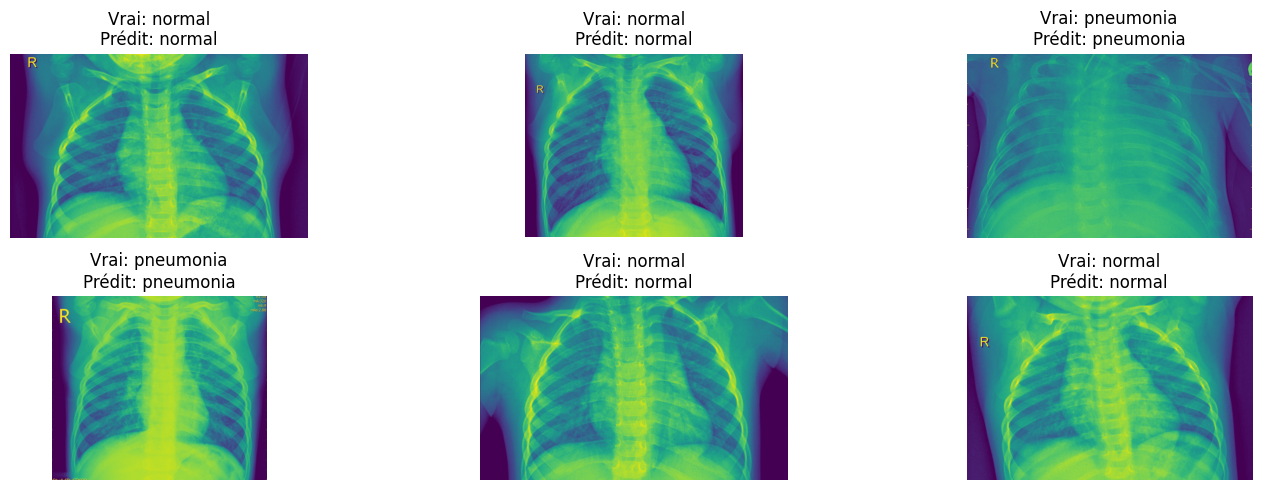

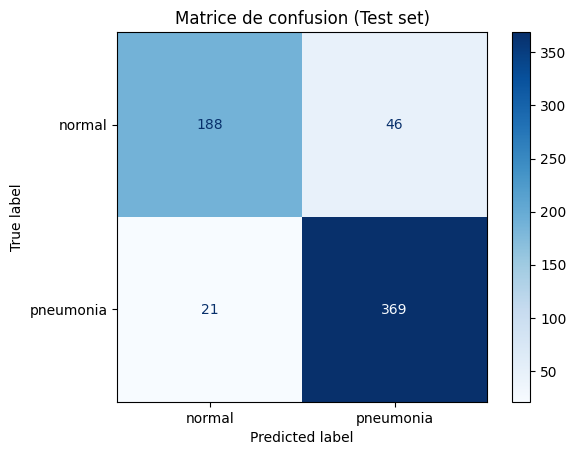


Classification report (Test set):
              precision    recall  f1-score   support

      normal     0.8995    0.8034    0.8488       234
   pneumonia     0.8892    0.9462    0.9168       390

    accuracy                         0.8926       624
   macro avg     0.8943    0.8748    0.8828       624
weighted avg     0.8930    0.8926    0.8913       624



In [ ]:
from datasets import Dataset, Image as HFImage, ClassLabel, Features, Value
from transformers import ViTImageProcessor, ViTForImageClassification, ViTConfig, TrainingArguments, Trainer
from torchvision.transforms import Compose, Normalize, ToTensor, RandomRotation, RandomHorizontalFlip, Resize, RandomAffine, ColorJitter, RandomResizedCrop
from PIL import Image as PILImage
import torch
import evaluate
import numpy as np
from pathlib import Path
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
import random
import warnings
warnings.filterwarnings("ignore")

# Nettoyer la mémoire GPU
import gc
gc.collect()
torch.cuda.empty_cache()

# Vérifier GPU
print("Vérification GPU :")
!nvidia-smi

# Chemins
processed_path = Path("/content/drive/MyDrive/pneumonia-ViT3/dataset/processed_dataset_v7")

# Définir les features
features = Features({
    'image': HFImage(decode=True),
    'label': ClassLabel(num_classes=2, names=['normal', 'pneumonia']),
    'split': Value(dtype='string')
})

# Charger train_val et test
try:
    train_val_df = pd.read_csv(processed_path / "train_val.csv")
    test_df = pd.read_csv(processed_path / "test.csv")
    print(f"Train+Val shape: {train_val_df.shape}")
    print(f"Test shape: {test_df.shape}")
except FileNotFoundError as e:
    print(f"Erreur : Fichiers CSV non trouvés dans {processed_path}. Réexécutez la Cellule 6.")
    raise e

# Créer datasets
dataset = Dataset.from_pandas(train_val_df, features=features)
test_dataset = Dataset.from_pandas(test_df, features=features)

# Split 80-20
dataset = dataset.train_test_split(test_size=0.2, shuffle=True, stratify_by_column="label")
train_dataset = dataset['train']
val_dataset = dataset['test']
print(f"Train dataset: {len(train_dataset)}, Val dataset: {len(val_dataset)}, Test dataset: {len(test_dataset)}")

# Mapper les étiquettes
def map_label2id(example):
    example['label'] = features['label'].str2int(example['label'])
    return example

train_dataset = train_dataset.map(map_label2id, batched=True)
val_dataset = val_dataset.map(map_label2id, batched=True)
test_dataset = test_dataset.map(map_label2id, batched=True)

# Vérification des données
print("\nVérification des données :")
for split, df in [('train', train_val_df), ('test', test_df)]:
    pixel_means = []
    for img_path in tqdm(df['image'][:100], desc=f"Calcul moyenne pixels ({split})"):
        try:
            img = PILImage.open(img_path).convert('RGB')
            img_array = np.array(img) / 255.0
            pixel_means.append(img_array.mean())
        except Exception as e:
            print(f"Erreur sur {img_path}: {e}")
    print(f"Moyenne des pixels ({split}, 100 images) : {np.mean(pixel_means):.3f} ± {np.std(pixel_means):.3f}")

# Charger le processeur ViT
model_str = 'google/vit-base-patch16-224-in21k'
processor = ViTImageProcessor.from_pretrained(model_str)
# Utiliser les moyennes/écarts-types calculés dans la Cellule 6
image_mean = [0.471, 0.471, 0.471]
image_std = [0.238, 0.238, 0.238]
size = processor.size["height"]
print(f"Taille des images : {size}x{size}")

# Définir les transformations
normalize = Normalize(mean=image_mean, std=image_std)
train_transforms = Compose([
    Resize((size, size)),
    RandomHorizontalFlip(p=0.5),
    RandomRotation(degrees=15),
    RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.8, 1.2)),
    ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    RandomResizedCrop(size, scale=(0.8, 1.0)),
    ToTensor(),
    normalize
])
val_transforms = Compose([
    Resize((size, size)),
    ToTensor(),
    normalize
])
test_transforms = val_transforms

# Appliquer les transformations
def apply_train_transforms(examples):
    examples['pixel_values'] = [train_transforms(image.convert("RGB")) for image in examples['image']]
    return examples

def apply_val_transforms(examples):
    examples['pixel_values'] = [val_transforms(image.convert("RGB")) for image in examples['image']]
    return examples

def apply_test_transforms(examples):
    examples['pixel_values'] = [test_transforms(image.convert("RGB")) for image in examples['image']]
    return examples

train_dataset.set_transform(apply_train_transforms)
val_dataset.set_transform(apply_val_transforms)
test_dataset.set_transform(apply_test_transforms)

# Définir la fonction de collation
def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example['label'] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

# Configurer le modèle ViT
config = ViTConfig.from_pretrained(
    model_str,
    num_labels=2,
    hidden_dropout_prob=0.2,
    attention_probs_dropout_prob=0.2
)
model = ViTForImageClassification.from_pretrained(model_str, config=config)
model.config.id2label = {0: 'normal', 1: 'pneumonia'}
model.config.label2id = {'normal': 0, 'pneumonia': 1}
print(f"Nombre de paramètres entraînables : {model.num_parameters(only_trainable=True) / 1e6} M")

# Ajouter dropout
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(0.5),
    torch.nn.Linear(model.classifier.in_features, model.classifier.out_features)
)

# Calculer les poids des classes
class_counts = train_val_df['label'].value_counts()
total_samples = len(train_val_df)
class_weights = torch.tensor([total_samples / (2 * class_counts['normal']), total_samples / (2 * class_counts['pneumonia'])], dtype=torch.float).to('cuda')
print(f"Poids des classes : {class_weights}")

# Définir une classe Trainer personnalisée
class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights)
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

# Charger les métriques
accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")

def compute_metrics(eval_pred):
    predictions = eval_pred.predictions
    label_ids = eval_pred.label_ids
    predicted_labels = predictions.argmax(axis=1)
    acc_score = accuracy.compute(predictions=predicted_labels, references=label_ids)['accuracy']
    f1_score = f1.compute(predictions=predicted_labels, references=label_ids, average='macro')['f1']
    return {"accuracy": acc_score, "f1": f1_score}

# Configurer l'entraînement
model_name = "pneumonia_chest_xray_vit_v8"
args = TrainingArguments(
    output_dir=model_name,
    logging_dir='./logs',
    eval_strategy="epoch",
    learning_rate=1e-6,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=4,
    num_train_epochs=15,
    weight_decay=0.15,
    warmup_steps=50,
    remove_unused_columns=False,
    save_strategy='epoch',
    load_best_model_at_end=True,
    save_total_limit=1,
    lr_scheduler_type="reduce_lr_on_plateau",
    lr_scheduler_kwargs={'factor': 0.1, 'patience': 2},
    fp16=True,
    gradient_accumulation_steps=4,
    max_grad_norm=1.0,
    report_to="none"
)

# Créer le Trainer
trainer = WeightedTrainer(
    model,
    args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    tokenizer=processor
)

# Évaluer avant entraînement
print("\nÉvaluation avant entraînement :")
trainer.evaluate()

# Entraîner le modèle
print("\nEntraînement du modèle...")
trainer.train()

# Sauvegarder le modèle
trainer.save_model(f"/content/drive/MyDrive/pneumonia-ViT3/models/{model_name}")
print(f"Modèle sauvegardé : /content/drive/MyDrive/pneumonia-ViT3/models/{model_name}")

# Évaluer après entraînement
print("\nÉvaluation après entraînement (validation) :")
val_results = trainer.evaluate()
print(f"Accuracy validation : {val_results['eval_accuracy']}")
print(f"F1 validation : {val_results['eval_f1']}")

# Prédictions sur le test set
print("\nPrédictions sur le test set :")
outputs = trainer.predict(test_dataset)
print(f"Accuracy test : {outputs.metrics['test_accuracy']}")
print(f"F1 test : {outputs.metrics['test_f1']}")

# Visualisation des prédictions
id2label = {0: 'normal', 1: 'pneumonia'}
num_images = 6
random_indices = random.sample(range(len(test_dataset)), num_images)
images = [test_dataset[i]['image'] for i in random_indices]
true_labels = [test_dataset[i]['label'] for i in random_indices]
pred_labels = outputs.predictions[random_indices].argmax(axis=1)

plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Vrai: {id2label[true_labels[i]]}\nPrédit: {id2label[pred_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Matrice de confusion et classification report
true_labels_all = outputs.label_ids
pred_labels_all = outputs.predictions.argmax(axis=1)
cm = confusion_matrix(true_labels_all, pred_labels_all)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'pneumonia'])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion (Test set)")
plt.show()

print("\nClassification report (Test set):")
print(classification_report(true_labels_all, pred_labels_all, target_names=['normal', 'pneumonia'], digits=4))